<a href="https://colab.research.google.com/github/ParthGadekar0631/Heart_Disease_Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction


### Data Preparation

In [73]:
# Importing necessary libraries for classification project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier

from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)

In [31]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv('heart_2022_no_nans.csv')

# print the first 5 rows of the dataset
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [32]:
# Encode categorical variables
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])
df_encoded.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,0,0,4,4.0,0.0,3,1,9.0,3,0,...,1.60,71.67,27.99,0,0,1,1,1,0,0
1,0,1,4,0.0,0.0,3,1,6.0,3,0,...,1.78,95.25,30.13,0,0,1,1,2,0,0
2,0,1,4,0.0,0.0,3,0,8.0,1,0,...,1.85,108.86,31.66,1,0,0,1,0,0,2
3,0,0,1,5.0,0.0,3,1,9.0,3,0,...,1.70,90.72,31.32,0,0,1,1,0,0,2
4,0,0,2,3.0,15.0,3,1,5.0,0,0,...,1.55,79.38,33.07,0,0,1,1,0,0,0


In [33]:
# Getting information about the dataset
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  int64  
 1   Sex                        246022 non-null  int64  
 2   GeneralHealth              246022 non-null  int64  
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  int64  
 6   PhysicalActivities         246022 non-null  int64  
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  int64  
 9   HadHeartAttack             246022 non-null  int64  
 10  HadAngina                  246022 non-null  int64  
 11  HadStroke                  246022 non-null  int64  
 12  HadAsthma                  246022 non-null  int64  
 13  HadSkinCancer              24

In [34]:
# Checking for missing values
df_encoded.isnull().sum()

,0
State,0
Sex,0
GeneralHealth,0
PhysicalHealthDays,0
MentalHealthDays,0
LastCheckupTime,0
PhysicalActivities,0
SleepHours,0
RemovedTeeth,0
HadHeartAttack,0


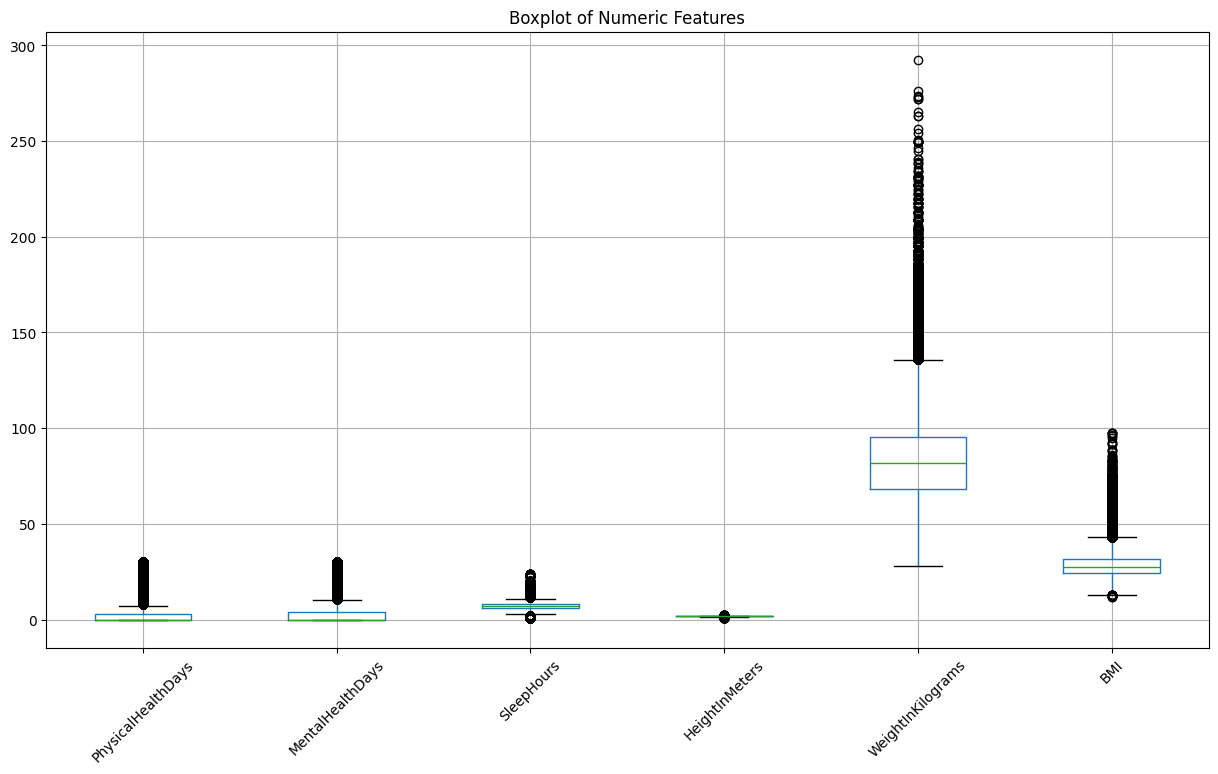

{'PhysicalHealthDays': 0,
 'MentalHealthDays': 0,
 'SleepHours': 0,
 'HeightInMeters': 0,
 'WeightInKilograms': 0,
 'BMI': 0}

In [35]:
# Define numerical columns
target_col = 'HadHeartAttack'  # Dependent variable
numerical_cols = df.drop(columns=[target_col]).select_dtypes(include=['int64', 'float64']).columns

# Boxplot to visualize outliers
plt.figure(figsize=(15, 8))
df[numerical_cols].boxplot(rot=45)
plt.title('Boxplot of Numeric Features')
plt.show()

# Using IQR to detect and handle outliers
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Handling outliers: Cap extreme values using IQR
for col in numerical_cols:
    _, lower, upper = detect_outliers_iqr(df, col)
    df[col] = np.clip(df[col], lower, upper)

# Checking for outliers in each numerical column
outlier_counts = {}
for col in numerical_cols:
    outliers, _, _ = detect_outliers_iqr(df, col)
    outlier_counts[col] = len(outliers)

# Display the number of outliers per column
outlier_counts


In [36]:
# Statisitcal measures about the data
df_encoded.describe()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
count,246022.000000,246022.00000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,...,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000,246022.000000
mean,27.529396,0.48049,2.283385,4.119026,4.167140,2.622424,0.777646,7.021331,1.822122,0.054609,...,1.705150,83.615179,28.668136,0.549979,0.343473,0.533269,0.406029,1.130525,0.042988,0.605799
std,15.466131,0.49962,1.473867,8.405844,8.102687,0.830432,0.415829,1.440681,1.350290,0.227216,...,0.106654,21.323156,6.513973,0.497497,0.474869,0.498893,0.491091,0.969316,0.202831,0.900277
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.910000,28.120000,12.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.00000,1.000000,0.000000,0.000000,3.000000,1.000000,6.000000,0.000000,0.000000,...,1.630000,68.040000,24.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.00000,2.000000,0.000000,0.000000,3.000000,1.000000,7.000000,3.000000,0.000000,...,1.700000,81.650000,27.460000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,42.000000,1.00000,4.000000,3.000000,4.000000,3.000000,1.000000,8.000000,3.000000,0.000000,...,1.780000,95.250000,31.890000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000
max,53.000000,1.00000,4.000000,30.000000,30.000000,3.000000,1.000000,24.000000,3.000000,1.000000,...,2.410000,292.570000,97.650000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,2.000000


In [37]:
# Checking the distribution of the target variable
df_encoded['HadHeartAttack'].value_counts()

,count
HadHeartAttack,
0,232587
1,13435


1 --> Defective Heart

0 --> Healthy Heart

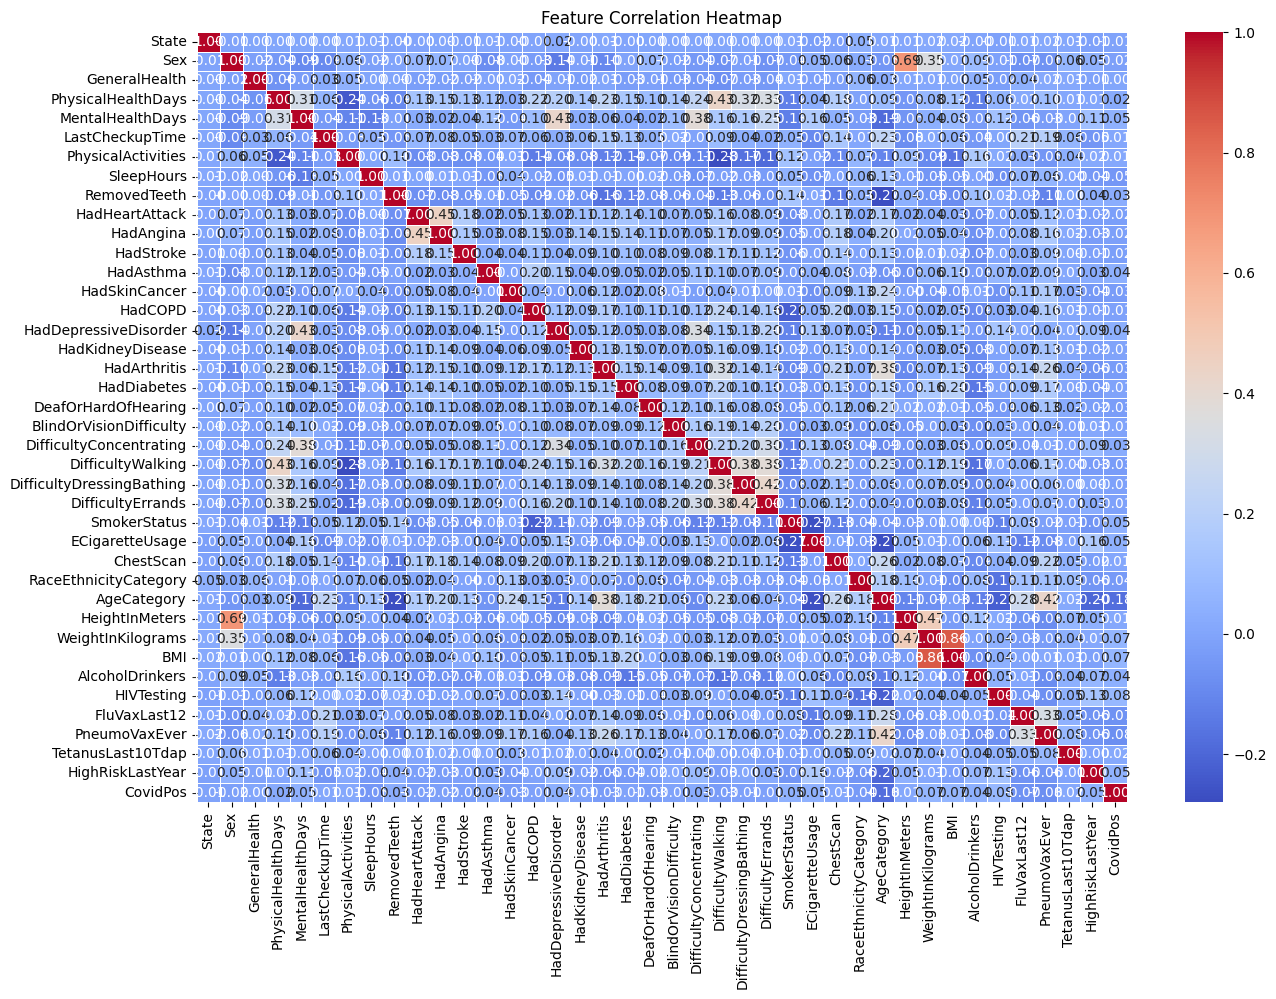

Dropped highly correlated features: {'BMI'}


In [38]:
# Compute correlation matrix on encoded data
correlation_matrix = df_encoded.corr()

# Visualize correlation matrix as a heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# Identify highly correlated features (threshold = 0.85)
thresh = 0.85
high_corr_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > thresh:
            high_corr_features.add(correlation_matrix.columns[i])

# Drop highly correlated features (excluding target)
high_corr_features.discard('HadHeartAttack')
df_encoded = df_encoded.drop(columns=high_corr_features)

# Print removed features
print("Dropped highly correlated features:", high_corr_features)


##Splitting the Features and Target

In [39]:
# Define features and target from the encoded dataset
X = df_encoded.drop(columns='HadHeartAttack', axis=1)  # All features
Y = df_encoded['HadHeartAttack']  # Target variable (binary: 0 or 1)

# Display the feature matrix
print(X)

        State  Sex  GeneralHealth  PhysicalHealthDays  MentalHealthDays  \
0           0    0              4                 4.0               0.0   
1           0    1              4                 0.0               0.0   
2           0    1              4                 0.0               0.0   
3           0    0              1                 5.0               0.0   
4           0    0              2                 3.0              15.0   
...       ...  ...            ...                 ...               ...   
246017     48    1              4                 0.0               0.0   
246018     48    0              1                 0.0               7.0   
246019     48    1              2                 0.0              15.0   
246020     48    0              0                 2.0               2.0   
246021     48    1              4                 0.0               0.0   

        LastCheckupTime  PhysicalActivities  SleepHours  RemovedTeeth  \
0                     3   

In [40]:
print(Y)

0         0
1         0
2         0
3         0
4         0
         ..
246017    0
246018    0
246019    0
246020    0
246021    1
Name: HadHeartAttack, Length: 246022, dtype: int64


##Splitting the Data into Training and Test data

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=20029972)
print(X.shape, X_train.shape, X_test.shape)

(246022, 38) (196817, 38) (49205, 38)


##Model Training and Evaluation



### 1. Logistic Regression Model

In [13]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Logistic Regression Model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, Y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test_scaled)
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

In [14]:
# Model Evaluation
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred_prob)

In [15]:
# Displaying Results
print("Logistic Regression Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")

Logistic Regression Performance Metrics:
Accuracy: 0.9479
Precision: 0.5505
Recall: 0.2516
F1 Score: 0.3453
AUC-ROC Score: 0.8918


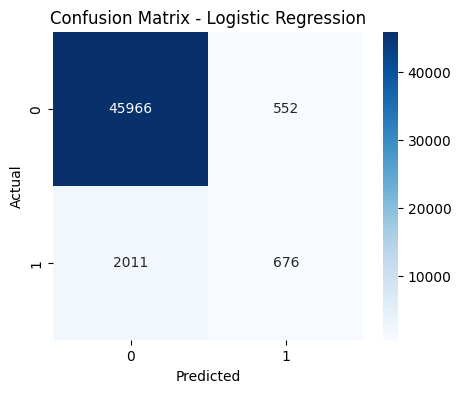

In [16]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

### 2. K-Nearest Neighbors (KNN)

In [62]:
# Using a subset of training data (20,000 samples) for faster runtime
X_train_knn = X_train_scaled[:20000]
Y_train_knn = Y_train[:20000]

# Initialize KNN with speed-optimized parameters
knn = KNeighborsClassifier(n_neighbors=3, algorithm='kd_tree')
knn.fit(X_train_knn, Y_train_knn)

# Predictions on full test set
y_pred_knn = knn.predict(X_test_scaled)
y_pred_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]

In [70]:
# Model Evalution
acc_knn = accuracy_score(Y_test, y_pred_knn)
prec_knn = precision_score(Y_test, y_pred_knn)
recall_knn = recall_score(Y_test, y_pred_knn)
f1_knn = f1_score(Y_test, y_pred_knn)
roc_knn = roc_auc_score(Y_test, y_pred_prob_knn)

In [71]:
# Displaying the result of the Model Evaluation
print("K-Nearest Neighbors Performance Metrics:")
print(f"Accuracy: {acc_knn:.4f}")
print(f"Precision: {prec_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")
print(f"AUC-ROC Score: {roc_knn:.4f}")

K-Nearest Neighbors Performance Metrics:
Accuracy: 0.9421
Precision: 0.4382
Recall: 0.2110
F1 Score: 0.2849
AUC-ROC Score: 0.7105


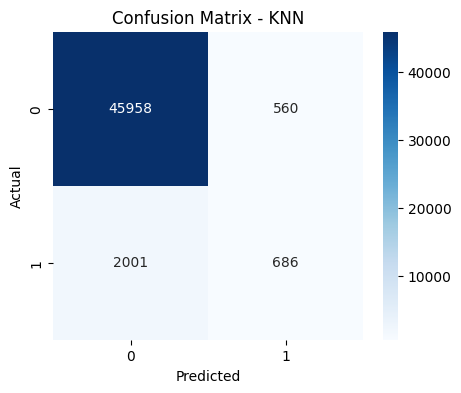

In [72]:
# Printing the Confusion Matrix for KNN
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

### 3. Decision Tree

In [17]:
# Initialize and Train Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

# Making predictions
y_pred = dt.predict(X_test)
y_pred_prob = dt.predict_proba(X_test)[:, 1]

In [18]:
# Model Evaluation
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred_prob)

In [19]:
# Displaying the result of Model Evalution
print("Decision Tree Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")

Decision Tree Performance Metrics:
Accuracy: 0.9124
Precision: 0.2458
Recall: 0.2921
F1 Score: 0.2670
AUC-ROC Score: 0.6202


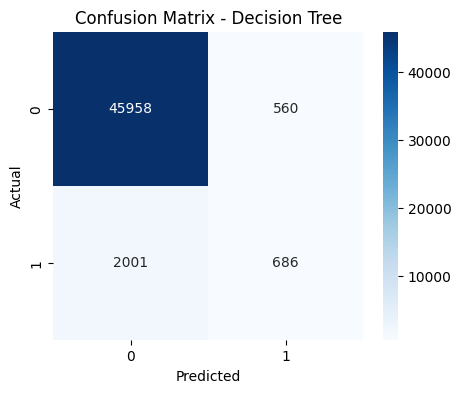

In [68]:
# Plotting the Confusion Matrix for Decision Tree
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

### 4. Random Forest

In [21]:
# Initialize and Train Decision Tree model
rf = RandomForestClassifier(n_estimators=100, random_state=20029972)
rf.fit(X_train_scaled, Y_train)

# Make predictions
y_pred = rf.predict(X_test_scaled)
y_pred_prob = rf.predict_proba(X_test_scaled)[:, 1]

In [22]:
# Model Evaluation
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred_prob)

In [23]:
# Displaying the results of the Model Evalution
print("Random Forest Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")

Random Forest Performance Metrics:
Accuracy: 0.9488
Precision: 0.6030
Recall: 0.1820
F1 Score: 0.2796
AUC-ROC Score: 0.8802


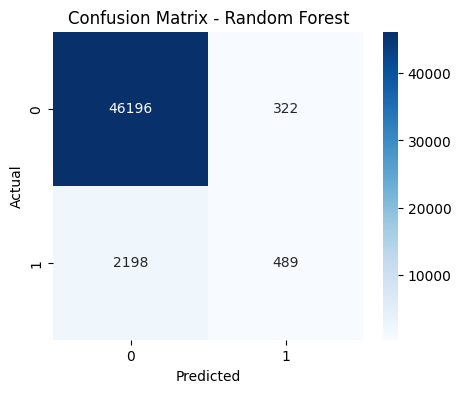

In [24]:
# Printing the Confusion Matrix for Random Forest
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

### 5. Support Vector Machine (SVM)

In [46]:
# Initialize base SVM
base_svm = LinearSVC(max_iter=5000)

# Wrap in CalibratedClassifierCV to enable probability prediction amd train the model
svm = CalibratedClassifierCV(base_svm)
svm.fit(X_train, Y_train)

# Predictions
y_pred = svm.predict(X_test)
y_pred_prob = svm.predict_proba(X_test)[:, 1]

In [47]:
# Model Evalution
accuracy = accuracy_score(Y_test, y_pred)
precision = precision_score(Y_test, y_pred)
recall = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
roc_auc = roc_auc_score(Y_test, y_pred_prob)

In [48]:
# Print the results of Model Evalution
print("Support Vector Machine (SVM) Performance Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC Score: {roc_auc:.4f}")

Support Vector Machine (SVM) Performance Metrics:
Accuracy: 0.9480
Precision: 0.5506
Recall: 0.2553
F1 Score: 0.3488
AUC-ROC Score: 0.8909


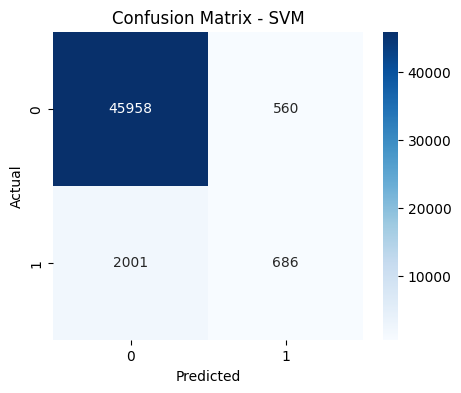

In [49]:
# Displaying the Confusion Matrix for SVM
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

### 6. Gradient Boosting Classifier

In [42]:
# Initialize and train the Ridge Regression Model
gb = GradientBoostingClassifier()
gb.fit(X_train, Y_train)

# Make predictions
y_pred_gb = gb.predict(X_test)

In [43]:
# Model Evaluation
acc_gb = accuracy_score(Y_test, y_pred_gb)
prec_gb = precision_score(Y_test, y_pred_gb)
recall_gb = recall_score(Y_test, y_pred_gb)
f1_gb = f1_score(Y_test, y_pred_gb)

In [44]:
# Displaying the result of the Model Evaluation
print("Gradient Boosting Classifier Performance Metrics:")
print(f"Accuracy: {acc_gb:.4f}")
print(f"Precision: {prec_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1-Score: {f1_gb:.4f}")

Gradient Boosting Classifier Performance Metrics:
Accuracy: 0.9492
Precision: 0.5780
Recall: 0.2564
F1-Score: 0.3552


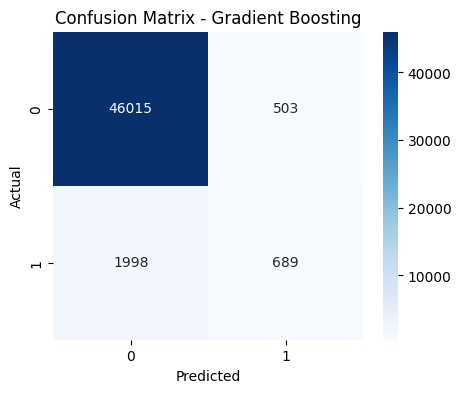

In [67]:
# Plotting the actual vs predicted values
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(Y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

### 7. AdaBoost Classifier

In [52]:
# Initialize and Train the AdaBoost Classifier Model
ada = AdaBoostClassifier()
ada.fit(X_train, Y_train)

# Predictions
y_pred_ada = ada.predict(X_test)

In [53]:
# Model Evaluation
acc_ada = accuracy_score(Y_test, y_pred_ada)
prec_ada = precision_score(Y_test, y_pred_ada)
recall_ada = recall_score(Y_test, y_pred_ada)
f1_ada = f1_score(Y_test, y_pred_ada)

In [63]:
# Print the results of Model Evalution
print("AdaBoost Classifier Performance Metrics:")
print(f"Accuracy: {acc_ada:.4f}")
print(f"Precision: {prec_ada:.4f}")
print(f"Recall: {recall_ada:.4f}")
print(f"F1 Score: {f1_ada:.4f}")

AdaBoost Classifier Performance Metrics:
Accuracy: 0.9484
Precision: 0.5568
Recall: 0.2680
F1 Score: 0.3618


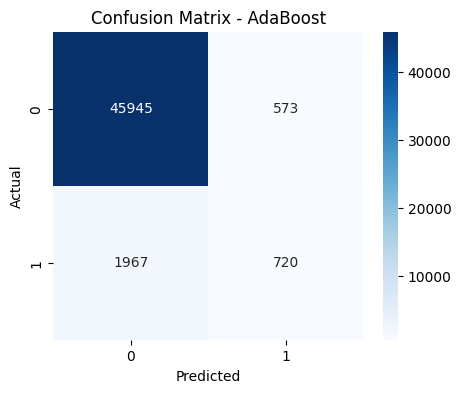

In [65]:
# Plotting the actual vs predicted values
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(Y_test, y_pred_ada), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - AdaBoost")
plt.show()

### 8. XGBoost

In [58]:
# Initialize and Train XGBoost Classifier Model
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, Y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

In [59]:
# Model Evaluation
acc_xgb = accuracy_score(Y_test, y_pred_xgb)
prec_xgb = precision_score(Y_test, y_pred_xgb)
recall_xgb = recall_score(Y_test, y_pred_xgb)
f1_xgb = f1_score(Y_test, y_pred_xgb)

In [64]:
# Print the results of Model Evalution
print("XGBoost Classifier Performance Metrics:")
print(f"Accuracy: {acc_xgb:.4f}")
print(f"Precision: {prec_xgb:.4f}")
print(f"Recall: {recall_xgb:.4f}")
print(f"F1 Score: {f1_xgb:.4f}")

XGBoost Classifier Performance Metrics:
Accuracy: 0.9482
Precision: 0.5565
Recall: 0.2512
F1 Score: 0.3462


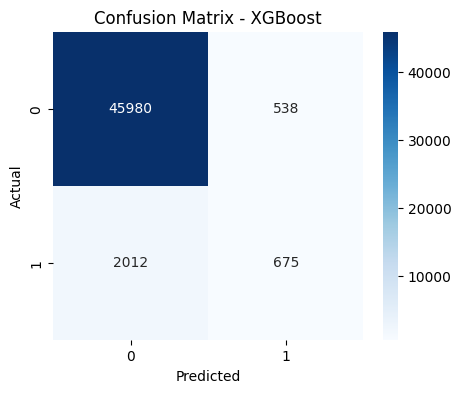

In [66]:
# Plotting the actual vs predicted values
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(Y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()